In [146]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
data = pd.read_csv("./movie_metadata.csv")

In [3]:
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [5]:
# remove unnecessary columns and only show columns that are quantitative
data2 = data[["num_critic_for_reviews","movie_facebook_likes","duration",
              "director_facebook_likes","actor_3_facebook_likes",
              "actor_2_facebook_likes","actor_1_facebook_likes","gross","num_voted_users",
              "cast_total_facebook_likes","facenumber_in_poster","num_user_for_reviews",
              "budget","imdb_score"]]

In [6]:
data2 = data2.dropna(axis=0, how='any')

In [11]:
# shows the correlation bewteen the variables
data2.corr()

,num_critic_for_reviews,movie_facebook_likes,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,imdb_score
num_critic_for_reviews,1.000000,0.702663,0.235311,0.179777,0.257550,0.259501,0.172598,0.474987,0.599131,0.244104,-0.034596,0.572230,0.107273,0.341436
movie_facebook_likes,0.702663,1.000000,0.217291,0.164140,0.273955,0.235053,0.132785,0.371443,0.520438,0.208307,0.015628,0.374728,0.053899,0.277613
duration,0.235311,0.217291,1.000000,0.180983,0.127695,0.131589,0.086601,0.249561,0.341400,0.123459,0.031081,0.354099,0.069006,0.359831
director_facebook_likes,0.179777,0.164140,0.180983,1.000000,0.119323,0.118120,0.091286,0.142398,0.302283,0.120599,-0.047434,0.220482,0.019200,0.189875
actor_3_facebook_likes,0.257550,0.273955,0.127695,0.119323,1.000000,0.554517,0.253757,0.303585,0.271473,0.490159,0.104592,0.209825,0.041173,0.064701
actor_2_facebook_likes,0.259501,0.235053,0.131589,0.118120,0.554517,1.000000,0.391886,0.257079,0.249122,0.642854,0.073004,0.192639,0.036919,0.101937
actor_1_facebook_likes,0.172598,0.132785,0.086601,0.091286,0.253757,0.391886,1.000000,0.148941,0.183524,0.945203,0.064624,0.127194,0.017504,0.092252
gross,0.474987,0.371443,0.249561,0.142398,0.303585,0.257079,0.148941,1.000000,0.630008,0.240879,-0.031113,0.551264,0.101658,0.211533
num_voted_users,0.599131,0.520438,0.341400,0.302283,0.271473,0.249122,0.183524,0.630008,1.000000,0.253722,-0.032451,0.781874,0.068259,0.474115
cast_total_facebook_likes,0.244104,0.208307,0.123459,0.120599,0.490159,0.642854,0.945203,0.240879,0.253722,1.000000,0.086647,0.184908,0.030024,0.105319


In [14]:
x = data2.ix[:,0:13]
y = data2.ix[:,13]
col_name = list(x.columns) # record names of all columns

In [29]:
# implement Ordinary Least Square
lr = LinearRegression(normalize=True, copy_X=True)
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [62]:
x1 = x.as_matrix()
x2 = x1.T
arr = np.linalg.inv(np.dot(x2,x1))
v = np.diagonal(arr)
std_err = x.std(axis=0).tolist()
z_score = lr.coef_ / (std_err*np.sqrt(v))
z_score

In [64]:
stat_summary = pd.DataFrame()
# calculate standard error
stat_summary["StdError"] = x.std(axis=0)
# calculate Linear Regression Coefficients
stat_summary["Coefficients"] = lr.coef_
# calculate z score
stat_summary["Zscore"] = z_score

In [65]:
stat_summary

,StdError,Coefficients,Zscore
num_critic_for_reviews,1.238046e+02,1.471630e-03,5.872421e-02
movie_facebook_likes,2.119385e+04,-2.516713e-06,-1.077934e-04
duration,2.267018e+01,1.178898e-02,1.776272e+00
director_facebook_likes,3.024288e+03,6.264371e-06,3.686466e-04
actor_3_facebook_likes,1.868418e+03,7.858293e-05,1.677580e-03
actor_2_facebook_likes,4.492134e+03,8.076343e-05,1.121585e-03
actor_1_facebook_likes,1.538973e+04,7.841893e-05,3.342573e-04
gross,6.978767e+07,-1.859031e-09,-8.426369e-08
num_voted_users,1.507131e+05,4.048989e-06,1.327799e-04
cast_total_facebook_likes,1.895739e+04,-7.792545e-05,-2.706289e-04


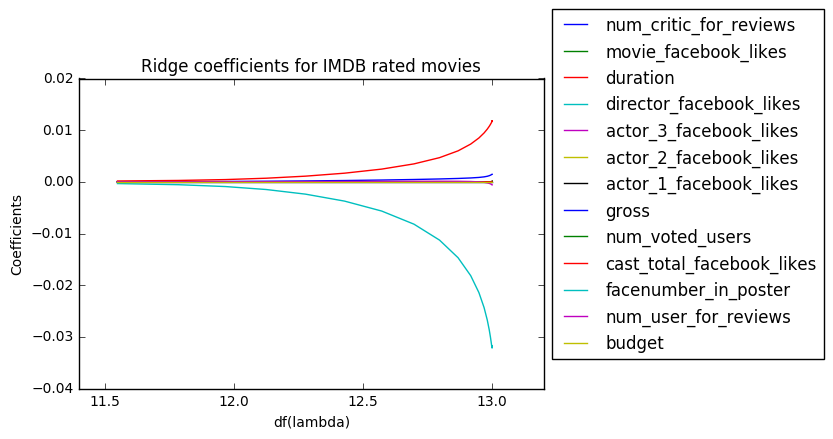

In [155]:
# implement ridge regression
rl = Ridge(alpha = 100.0, normalize=True, copy_X = True)
x_std = StandardScaler().fit_transform(x)
rl.fit(x_std,y)
plotLength = 100
z = x_std
zt = np.transpose(z)
p = z.shape
alpha = np.logspace(-20,2,num = 100)
D = np.zeros([plotLength,13])
df = np.zeros([plotLength,13])

x_rl = data2.ix[:,0:13]
y_rl = data2.ix[:,13]

for i in range(plotLength):
    a = alpha[i]
    ztz = np.dot(zt,z)
    smoothingMatrix = np.dot(np.dot(z, np.linalg.inv(ztz + a * np.identity(p[1]) )), zt)
    dfi = np.trace(smoothingMatrix)
    df[i,0:13] = dfi
    rl_2 = Ridge(alpha = a, normalize = True, copy_X = True)
    rl_2.fit(x_rl,y)
    D[i,0:13] = rl_2.coef_
for i in range(13):
    plt.plot(df[:,i], D[:,i],label=col_name[i])
plt.title("Ridge coefficients for IMDB rated movies")
plt.xlabel("df(lambda)")
plt.ylabel("Coefficients")
plt.legend(bbox_to_anchor=(1, 1.25), loc='upper left', ncol=1)
plt.figure()

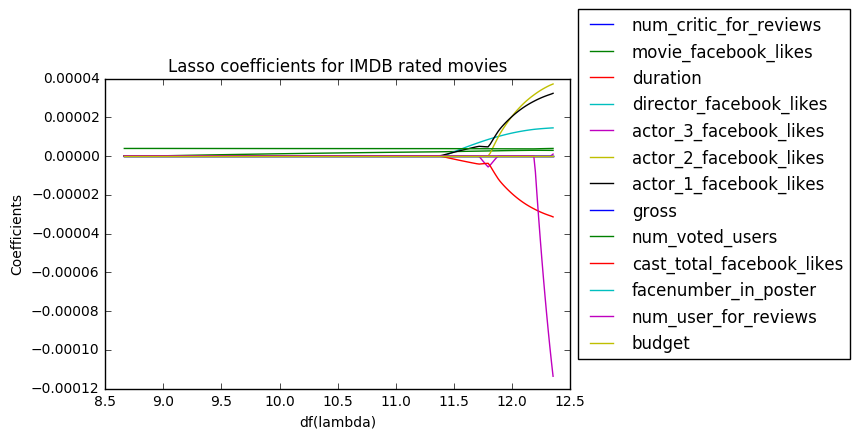

In [157]:
# implement lasso regression
lasso = Lasso(alpha = 0.0001)
lasso.fit(x,y)
D = np.zeros([plotLength,13])
df = np.zeros([plotLength,13])
alpha = np.logspace(1,3,num = 100)

for i in range(plotLength):
    a = alpha[i]
    ztz = np.dot(zt,z)
    smoothingMatrix = np.dot(np.dot(z, np.linalg.inv(ztz + a * np.identity(p[1]) )), zt)
    dfi = np.trace(smoothingMatrix)
    df[i,0:13] = dfi
    la = Lasso(alpha = a, normalize = False, copy_X = True, max_iter = 200)
    la.fit(x_rl,y_rl)
    D[i,0:13] = la.coef_

for i in range(13):
    plt.plot(df[:,i], D[:,i],label=col_name[i])
plt.title("Lasso coefficients for IMDB rated movies")
plt.xlabel("df(lambda)")
plt.ylabel("Coefficients")
plt.legend(bbox_to_anchor=(1, 1.25), loc='upper left', ncol=1)
plt.show()

In [103]:
#Select k best
kbest = SelectKBest(f_regression, k=5)# can test for different values of k
ret = kbest.fit_transform(x,y)
selected = kbest.get_support()
selected

In [125]:
selected

array([ True,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False], dtype=bool)

In [111]:
# perform linear regression
col_selected = col_name
for i in range(0,13):
    if selected[i] == True:
        print col_selected[i]

num_critic_for_reviews
movie_facebook_likes
duration
num_voted_users
num_user_for_reviews


In [112]:
x_selected = x[["num_critic_for_reviews","movie_facebook_likes",
               "duration","num_voted_users","num_user_for_reviews"]]
# implement Ordinary Least Square
lr_selected = LinearRegression(normalize=True, copy_X=True)
lr_selected.fit(x_selected,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [119]:
model_temp = pd.DataFrame()
model_temp["Features"] = list(x_selected.columns)
model_temp["Best Subset"] = lr_selected.coef_
model_temp

,Features,Best Subset
0,num_critic_for_reviews,0.001313
1,movie_facebook_likes,-0.000003
2,duration,0.011389
3,num_voted_users,0.000004
4,num_user_for_reviews,-0.000596


In [142]:
model_summary = pd.DataFrame()
model_summary["Features"] = col_name
# calculate standard error
model_summary["LS"] = lr.coef_
# calculate Linear Regression Coefficients
model_summary["Ridge"] = rl.coef_
# calculate z score
model_summary["Lasso"] = lasso.coef_
model_summary = model_summary.merge(model_temp, how='outer',on='Features')
model_summary

,Features,LS,Ridge,Lasso,Best Subset
0,num_critic_for_reviews,1.471630e-03,6.547725e-04,1.472587e-03,0.001313
1,movie_facebook_likes,-2.516713e-06,2.360109e-06,-2.519060e-06,-0.000003
2,duration,1.178898e-02,5.997736e-03,1.178811e-02,0.011389
3,director_facebook_likes,6.264371e-06,1.532821e-05,6.271908e-06,NaN
4,actor_3_facebook_likes,7.858293e-05,-1.281722e-05,7.563395e-05,NaN
5,actor_2_facebook_likes,8.076343e-05,1.094435e-06,7.876094e-05,NaN
6,actor_1_facebook_likes,7.841893e-05,9.044289e-07,7.643105e-05,NaN
7,gross,-1.859031e-09,-3.108487e-13,-1.868824e-09,NaN
8,num_voted_users,4.048989e-06,1.108970e-06,4.049844e-06,0.000004
9,cast_total_facebook_likes,-7.792545e-05,1.760314e-07,-7.594742e-05,NaN
